#Pandas

##What is Pandas?
A Python library providing data structures and data analysis tools.

##Huh?
Think of it like Excel for Python that doesn't suck.

In [2]:
#By convention import pandas like:
import pandas as pd
#For fake data.
from numpy.random import randn
import numpy as np

#Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [3]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [4]:
num_series = pd.Series(randn(10))
num_series.head()

0    1.212042
1   -0.974782
2   -0.043153
3   -0.218214
4    0.132688
dtype: float64

In [5]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [6]:
fun_series = pd.Series([lambda x: x*i for i in range(10)])
fun_series.head()

0    <function <lambda> at 0x109211cf8>
1    <function <lambda> at 0x109211b90>
2    <function <lambda> at 0x109211d70>
3    <function <lambda> at 0x109211de8>
4    <function <lambda> at 0x109211e60>
dtype: object

#Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [7]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -0.870324
Alabama       1.041032
Indiana      -0.203621
Montana      -1.654428
Kentucky      1.581031
dtype: float64


Washington    0.875304
Alabama       0.827337
Montana      -0.899027
Indiana      -1.989425
New York      1.083379
dtype: float64


In [8]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama       1.868369
California         NaN
Indiana      -2.193045
Kentucky           NaN
Montana      -2.553455
New York           NaN
Washington         NaN
dtype: float64

In [9]:
indexed_series = pd.Series(randn(5*10), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*10)
#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

Alabama      -0.162075
California    0.447403
Indiana       0.283566
Kentucky     -0.074788
Montana       0.364133
dtype: float64

In [10]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31    0.504738
2015-02-28   -0.459458
2015-03-31    0.506868
2015-04-30   -0.915323
2015-05-31    0.059727
2015-06-30    0.575471
2015-07-31   -0.474501
2015-08-31    0.945958
2015-09-30   -2.055448
2015-10-31   -0.909151
Freq: M, dtype: float64

In [11]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q')

2015-03-31    0.184049
2015-06-30   -0.093375
2015-09-30   -0.527997
2015-12-31   -0.909151
Freq: Q-DEC, dtype: float64

#DataFrames
Data frames extend the concept of Series to table-like data.

In [12]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-1.657205,1.327598,0.089523,0.236615,-0.618540
2015-02-28,0.205703,0.492161,-0.908150,-1.046884,-1.866464
2015-03-31,-0.617292,1.294780,-0.868324,1.731087,1.072597
2015-04-30,-0.401299,1.053874,-2.168286,0.239333,-0.065319
2015-05-31,0.776351,-0.168937,0.766012,-0.893749,-0.384974
2015-06-30,-0.950140,1.092466,0.251853,-0.627443,-0.774666
2015-07-31,-0.043847,-1.650048,0.212819,-0.910350,-0.148582
2015-08-31,0.309600,0.133462,-0.274229,0.164151,0.170393
2015-09-30,-0.519885,-0.994730,-0.023866,1.131055,1.542167
2015-10-31,0.080585,-1.175553,-1.044394,1.079449,0.450442


In [13]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [14]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

pandas.core.series.Series

In [15]:
#The columns all have the same index:
col.index   

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-01-31, ..., 2015-10-31]
Length: 10, Freq: M, Timezone: None

In [16]:
#What's the index for the rows?
row.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

#DataFrame basics

In [17]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,-1.657205,1.327598,0.089523,0.236615,-0.618540,-0.329607
2015-02-28,0.205703,0.492161,-0.908150,-1.046884,-1.866464,0.697864
2015-03-31,-0.617292,1.294780,-0.868324,1.731087,1.072597,0.677488
2015-04-30,-0.401299,1.053874,-2.168286,0.239333,-0.065319,0.652575
2015-05-31,0.776351,-0.168937,0.766012,-0.893749,-0.384974,0.607414
2015-06-30,-0.950140,1.092466,0.251853,-0.627443,-0.774666,0.142326
2015-07-31,-0.043847,-1.650048,0.212819,-0.910350,-0.148582,-1.693895
2015-08-31,0.309600,0.133462,-0.274229,0.164151,0.170393,0.443061
2015-09-30,-0.519885,-0.994730,-0.023866,1.131055,1.542167,-1.514614
2015-10-31,0.080585,-1.175553,-1.044394,1.079449,0.450442,-1.094968


In [18]:
#Delete a column
df.drop('new', axis=1)

,a,b,c,d,e
2015-01-31,-1.657205,1.327598,0.089523,0.236615,-0.618540
2015-02-28,0.205703,0.492161,-0.908150,-1.046884,-1.866464
2015-03-31,-0.617292,1.294780,-0.868324,1.731087,1.072597
2015-04-30,-0.401299,1.053874,-2.168286,0.239333,-0.065319
2015-05-31,0.776351,-0.168937,0.766012,-0.893749,-0.384974
2015-06-30,-0.950140,1.092466,0.251853,-0.627443,-0.774666
2015-07-31,-0.043847,-1.650048,0.212819,-0.910350,-0.148582
2015-08-31,0.309600,0.133462,-0.274229,0.164151,0.170393
2015-09-30,-0.519885,-0.994730,-0.023866,1.131055,1.542167
2015-10-31,0.080585,-1.175553,-1.044394,1.079449,0.450442


##Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [19]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

,a,b,c,d,e,new
2015-01-31,-1.657205,1.327598,0.089523,0.236615,-0.618540,-0.329607
2015-02-28,0.205703,0.492161,-0.908150,-1.046884,-1.866464,0.697864
2015-03-31,-0.617292,1.294780,-0.868324,1.731087,1.072597,0.677488
2015-05-31,0.776351,-0.168937,0.766012,-0.893749,-0.384974,0.607414
2015-06-30,-0.950140,1.092466,0.251853,-0.627443,-0.774666,0.142326
2015-07-31,-0.043847,-1.650048,0.212819,-0.910350,-0.148582,-1.693895
2015-08-31,0.309600,0.133462,-0.274229,0.164151,0.170393,0.443061
2015-09-30,-0.519885,-0.994730,-0.023866,1.131055,1.542167,-1.514614
2015-10-31,0.080585,-1.175553,-1.044394,1.079449,0.450442,-1.094968


#Selecting subsets.
There a couple of ways to select a subset of a python data frame.

In [20]:
#To subset the rows, you can use the convenient:
df[df.a > 0]

,a,b,c,d,e,new
2015-02-28,0.205703,0.492161,-0.908150,-1.046884,-1.866464,0.697864
2015-05-31,0.776351,-0.168937,0.766012,-0.893749,-0.384974,0.607414
2015-08-31,0.309600,0.133462,-0.274229,0.164151,0.170393,0.443061
2015-10-31,0.080585,-1.175553,-1.044394,1.079449,0.450442,-1.094968


In [21]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

,a,b,c,d,e,new
2015-02-28,0.205703,0.492161,-0.908150,-1.046884,-1.866464,0.697864
2015-08-31,0.309600,0.133462,-0.274229,0.164151,0.170393,0.443061
2015-10-31,0.080585,-1.175553,-1.044394,1.079449,0.450442,-1.094968


In [22]:
#Selecting a column
df.a
#Works sometimes.

2015-01-31   -1.657205
2015-02-28    0.205703
2015-03-31   -0.617292
2015-04-30   -0.401299
2015-05-31    0.776351
2015-06-30   -0.950140
2015-07-31   -0.043847
2015-08-31    0.309600
2015-09-30   -0.519885
2015-10-31    0.080585
Freq: M, Name: a, dtype: float64

In [23]:
df['a'] #works always

2015-01-31   -1.657205
2015-02-28    0.205703
2015-03-31   -0.617292
2015-04-30   -0.401299
2015-05-31    0.776351
2015-06-30   -0.950140
2015-07-31   -0.043847
2015-08-31    0.309600
2015-09-30   -0.519885
2015-10-31    0.080585
Freq: M, Name: a, dtype: float64

In [24]:
df[['a', 'b']]
#Or a subset of columns

,a,b
2015-01-31,-1.657205,1.327598
2015-02-28,0.205703,0.492161
2015-03-31,-0.617292,1.294780
2015-04-30,-0.401299,1.053874
2015-05-31,0.776351,-0.168937
2015-06-30,-0.950140,1.092466
2015-07-31,-0.043847,-1.650048
2015-08-31,0.309600,0.133462
2015-09-30,-0.519885,-0.994730
2015-10-31,0.080585,-1.175553


#Advanced selection.
The above methods work for simple types of selections, but what if you need something more complex?

In [25]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,0.766012,-0.893749,-0.384974
2015-06-30,0.251853,-0.627443,-0.774666
2015-07-31,0.212819,-0.910350,-0.148582
2015-08-31,-0.274229,0.164151,0.170393


In [26]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,-0.868324,1.731087,1.072597
2015-04-30,-2.168286,0.239333,-0.065319
2015-05-31,0.766012,-0.893749,-0.384974
2015-06-30,0.251853,-0.627443,-0.774666
2015-07-31,0.212819,-0.910350,-0.148582


In [27]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

,a,b,c,d,e,new


In [28]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [29]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,-0.546028,-0.822243,-0.291714,-0.694214,-0.094855,Alabama
2015-02-28,-0.551993,0.288256,-0.261363,-0.327318,0.553394,Alaska
2015-03-31,0.618683,-1.279797,-0.249600,0.566629,1.959620,Arizona
2015-04-30,0.970790,1.361079,0.295785,0.687432,-0.650602,Alabama
2015-05-31,-0.862692,0.535427,-0.512315,1.246345,1.755285,Alaska


In [30]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.546028,-0.822243,-0.291714,-0.694214,-0.094855
Alaska,2015-02-28,-0.551993,0.288256,-0.261363,-0.327318,0.553394
Arizona,2015-03-31,0.618683,-1.279797,-0.249600,0.566629,1.959620
Alabama,2015-04-30,0.970790,1.361079,0.295785,0.687432,-0.650602
Alaska,2015-05-31,-0.862692,0.535427,-0.512315,1.246345,1.755285


In [31]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.546028,-0.822243,-0.291714,-0.694214,-0.094855
2015-04-30,0.970790,1.361079,0.295785,0.687432,-0.650602
2015-07-31,-1.507617,-0.352099,0.058671,1.457373,-0.439507
2015-10-31,-1.058088,-1.447244,1.391490,0.790345,-2.058820
2016-01-31,-0.120362,-0.585842,1.425730,1.307099,-0.165931


In [32]:
df.loc['2015-01-31'] #Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [33]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0   -0.546028
1   -0.822243
2   -0.291714
3   -0.694214
4   -0.094855
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

In [34]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

0                             1                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31 -0.546028       NaN       NaN -0.822243       NaN       NaN   
2015-02-28       NaN -0.551993       NaN       NaN  0.288256       NaN   
2015-03-31       NaN       NaN  0.618683       NaN       NaN -1.279797   
2015-04-30  0.970790       NaN       NaN  1.361079       NaN       NaN   
2015-05-31       NaN -0.862692       NaN       NaN  0.535427       NaN   

                   2                           3                      \
state        Alabama    Alaska Arizona   Alabama    Alaska   Arizona   
index                                                                  
2015-01-31 -0.291714       NaN     NaN -0.694214       NaN       NaN   
2015-02-28       NaN -0.261363     NaN       NaN -0.327318       NaN   
2015-03-31       NaN       NaN -0.2496       NaN       NaN  0.566629   
2015-04-30  0.295785       NaN     NaN  0.687432       NaN       NaN   
2015-05-31       NaN -0.512315     NaN       NaN  1.246345       NaN   

                   4                     
state        Alabama    Alaska  Arizona  
index                                    
2015-01-31 -0.094855       NaN      NaN  
2015-02-28       NaN  0.553394      NaN  
2015-03-31       NaN       NaN  1.95962  
2015-04-30 -0.650602       NaN      NaN  
2015-05-31       NaN  1.755285      NaN

In [35]:
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.546028,-0.822243,-0.291714,-0.694214,-0.094855
Alaska,2015-02-28,-0.551993,0.288256,-0.261363,-0.327318,0.553394
Arizona,2015-03-31,0.618683,-1.279797,-0.249600,0.566629,1.959620
Alabama,2015-04-30,0.970790,1.361079,0.295785,0.687432,-0.650602
Alaska,2015-05-31,-0.862692,0.535427,-0.512315,1.246345,1.755285


#split-apply-combine

In [36]:
df.groupby(level=1).mean().head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.546028,-0.822243,-0.291714,-0.694214,-0.094855
2015-02-28,-0.551993,0.288256,-0.261363,-0.327318,0.553394
2015-03-31,0.618683,-1.279797,-0.249600,0.566629,1.959620
2015-04-30,0.970790,1.361079,0.295785,0.687432,-0.650602
2015-05-31,-0.862692,0.535427,-0.512315,1.246345,1.755285


In [37]:
df.groupby(level=0).mean().head() #Groupby index

,0,1,2,3,4
state,,,,,
Alabama,0.037268,0.081085,0.420181,0.020299,-0.083521
Alaska,-0.329448,0.534201,-0.178615,0.462316,0.547336
Arizona,0.050443,0.108193,0.121912,-0.600514,0.237994


In [38]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

,0,1,2,3,4
state,,,,,
Alabama,0.037268,0.081085,0.420181,0.020299,-0.083521
Alaska,-0.329448,0.534201,-0.178615,0.462316,0.547336
Arizona,0.050443,0.108193,0.121912,-0.600514,0.237994


In [39]:
#Apply
g = df.groupby(level=0)

In [40]:
#If one row for each index.
g.aggregate(np.mean)

,0,1,2,3,4
state,,,,,
Alabama,0.037268,0.081085,0.420181,0.020299,-0.083521
Alaska,-0.329448,0.534201,-0.178615,0.462316,0.547336
Arizona,0.050443,0.108193,0.121912,-0.600514,0.237994


In [41]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.674210,-0.767335,-1.014870,-0.706299,-0.011594
Alaska,2015-02-28,-0.225259,-0.408031,-0.110461,-0.802035,0.004916
Arizona,2015-03-31,0.516673,-1.142311,-0.402138,1.177104,1.758756
Alabama,2015-04-30,1.079023,1.087295,-0.177338,0.659463,-0.580126
Alaska,2015-05-31,-0.539745,0.002034,-0.445460,0.796342,0.980200


In [42]:
#Different index than I started with.
g.apply(lambda x: x.describe()).head(12)

0          1          2          3          4
state                                                               
Alabama count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean    0.037268   0.081085   0.420181   0.020299  -0.083521
        std     0.865155   1.177228   0.701465   1.011630   0.977513
        min    -1.507617  -1.447244  -0.375247  -1.490115  -2.058820
        25%    -0.439611  -0.763143  -0.080384  -0.592628  -0.597828
        50%     0.169061  -0.317909   0.222923  -0.188092  -0.130393
        75%     0.799590   1.133440   1.078980   0.764617   0.735493
        max     0.970790   2.003367   1.425730   1.457373   1.109165
Alaska  count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.329448   0.534201  -0.178615   0.462316   0.547336
        std     0.987955   0.602762   0.749113   0.984538   1.232349
        min    -1.565014  -0.218996  -1.185870  -1.558486  -2.252353

#Reading and writing data.


In [43]:
df.to_csv('saved_data.csv', delimiter='\t')

In [44]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

In [45]:
"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

'Other methods:\npd.read_excel\npd.read_sql\npd.read_stata\n...\n'

#Other very useful things.

join, concat and merge

In [46]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

,state,index,0,1,2,3,4,governor
20,Arizona,2016-09-30,-0.112634,1.385187,0.916402,-0.086643,0.657601,Doug Ducey
23,Arizona,2016-12-31,-1.630700,0.045678,0.495404,-1.584445,0.489049,Doug Ducey
26,Arizona,2017-03-31,-1.978720,-1.570582,1.112793,-0.191446,-1.145482,Doug Ducey
29,Arizona,2017-06-30,0.985663,0.931330,0.703577,-1.322677,-0.654936,Doug Ducey
29,Arkansas,NaT,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [47]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

,0,1,2,3,4
state,,,,,
Alabama,0.037268,0.081085,0.420181,0.020299,-0.083521
Alaska,-0.329448,0.534201,-0.178615,0.462316,0.547336
Arizona,0.050443,0.108193,0.121912,-0.600514,0.237994


In [48]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

,0,1,2,3,4,governor
Alabama,0.037268,0.081085,0.420181,0.020299,-0.083521,Robert Bentley
Alaska,-0.329448,0.534201,-0.178615,0.462316,0.547336,Bill Walker
Arizona,0.050443,0.108193,0.121912,-0.600514,0.237994,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [64]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

,0,1,2,3,4,governor
Alabama,0.037268,0.081085,0.420181,0.020299,-0.083521,Robert Bentley
Alaska,-0.329448,0.534201,-0.178615,0.462316,0.547336,Bill Walker
Arizona,0.050443,0.108193,0.121912,-0.600514,0.237994,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


#Exploratory Data Analysis with Pandas

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


#Describe the continuous variables
##This treats the Boolean Windy variable as a series of 0's and 1's

In [192]:
df.describe()

,Temperature,Humidity,Windy
count,14.000000,14.000000,14
mean,73.571429,80.285714,0.4285714
std,6.571667,9.840486,0.5135526
min,64.000000,65.000000,False
25%,69.250000,71.250000,0
50%,72.000000,80.000000,0
75%,78.750000,88.750000,1
max,85.000000,96.000000,True


Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

##We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10edc7690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ed53b90>]], dtype=object)

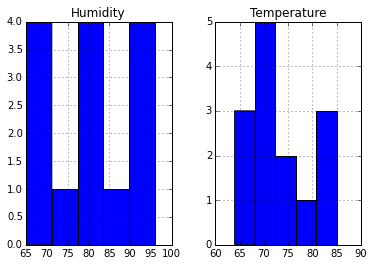

In [196]:
df.hist(['Temperature','Humidity'],bins=5)

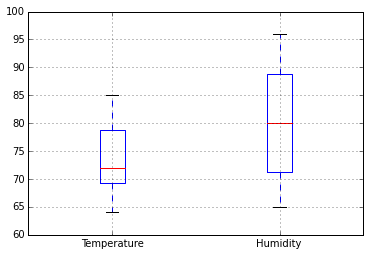

In [197]:
df[['Temperature','Humidity']].plot(kind='box')

###Scatterplots for examining bivariate relationships

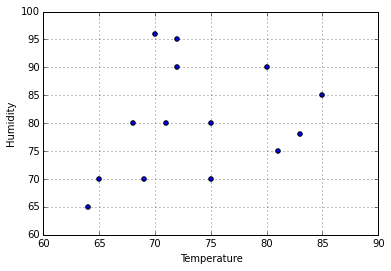

In [198]:
df.plot('Temperature', 'Humidity', kind='scatter')

###If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

In [199]:
groups=df.groupby('Outlook')
for name, group in groups:
    print name

overcast
rain
sunny


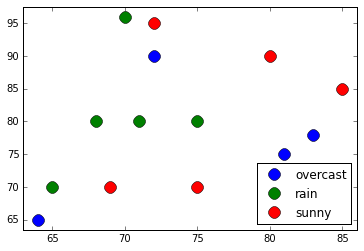

In [200]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

#What about the categorical variables? Frequency tables and relative frequency tables

###Simply df.value_counts() gets you the frequencies

In [201]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
dtype: int64

###Using apply will get you the value counts for multiple columns at once

In [202]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5
Play,NaN,9
overcast,4,NaN
rain,5,NaN
sunny,5,NaN


###Contingency Tables for looking at bivariate relationships between two categorical variables

In [203]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


###Often we want the row percentages

In [204]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


###Or the column percentages

In [205]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


#Enough...lets get to the pair sprint

https://www.youtube.com/watch?v=yGf6LNWY9AI